#### Sinusoid Signal Detectors

In this code, we generate a noisy sinusoid with known frequency and implement and observe the functioning of a sinusoid detector.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0.0, 900.0)

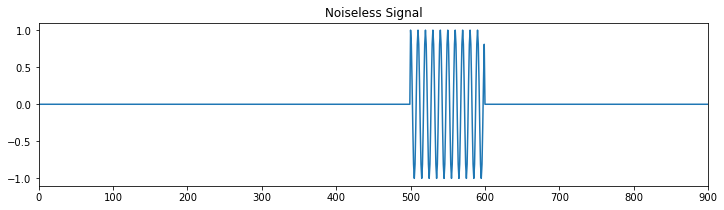

In [4]:
n = np.arange(100)
vect = np.zeros(500)
sig =  np.cos(2 * np.pi * 0.1 * n)   #Piece of original signal where signal is actually changing. A=1, f0=0.1, phase=0
sigma = np.sqrt(0.5)

Signal = np.concatenate((vect, sig))
Signal = np.concatenate((Signal, np.zeros(300)))  #concatenate the signal to create the one as shown.

x_axis = np.arange(900)   #used to plot x axis

plt.figure(figsize=(12, 3))
plt.title("Noiseless Signal")
plt.plot(x_axis,Signal)
plt.xlim(0,900)


**Create a Noisy version of the signal by adding Gaussian noise with a variance of 0.5**

(0.0, 900.0)

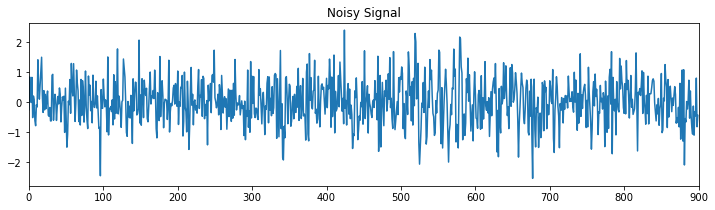

In [5]:
Signal_noisy = Signal + sigma * np.random.randn(Signal.size)  #Create a noisy version of the signal.

plt.figure(figsize=(12, 3))
plt.title("Noisy Signal")
plt.plot(x_axis,Signal_noisy)
plt.xlim(0,900)



We create a Detection filter by convolving the noisy signal with the sample signal piece. 

<b><i>sig =  np.cos(2 * np.pi * 0.1 * n)</b></i>

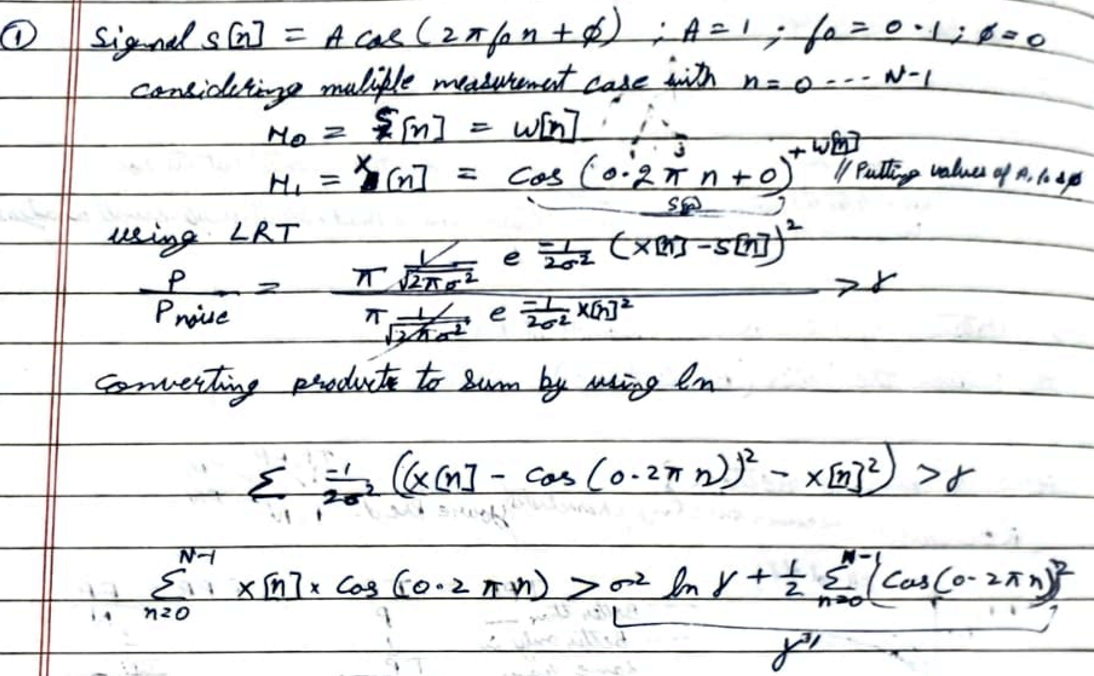

(0.0, 900.0)

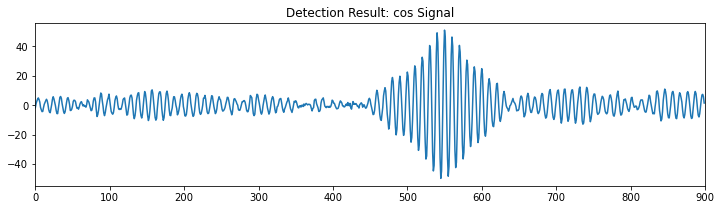

In [6]:
y = np.convolve(Signal_noisy, np.flip(sig), 'same')  #Convolve noisy singnal with the patch of original signal to detect.

plt.figure(figsize=(12, 3))
plt.title("Detection Result: cos Signal")
plt.plot(y)
plt.xlim(0,900)


#### Another Detector with a different kind of filter function.

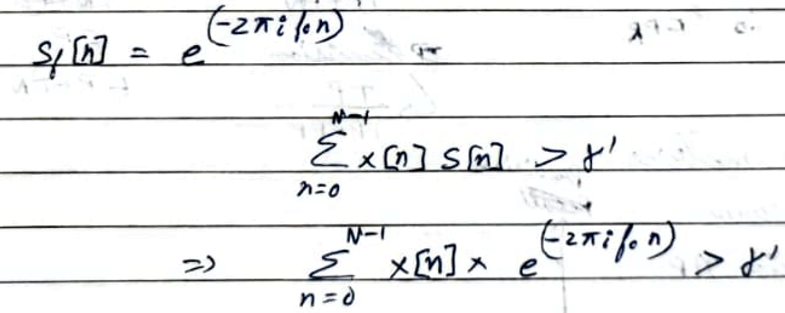

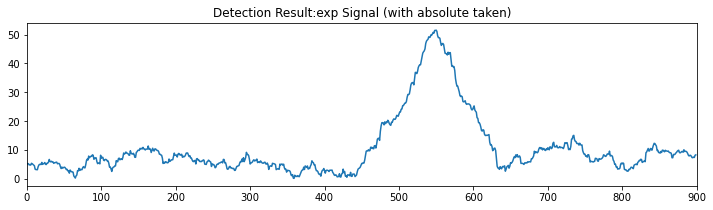

In [9]:
filter2 = np.exp(-2*np.pi * 0.1 *1j * n)                             #f0 taken as 0.1
y2 = np.convolve(Signal_noisy, filter2, 'same')  #np.flip(filter2)   #Convolve the noisy signal with the filter signal.

plt.figure(figsize=(12, 3))
plt.title("Detection Result:exp Signal (with absolute taken)")
#plt.plot(y2)        # plot y2
plt.plot(np.abs(y2)) # Take absolute of y2 and plot on same graph
plt.xlim(0,900)

plt.show()

We may set the threshold value gamma' by taking maximum and minimum value of the signal and then dividing by two. above which we can consider the signal to be present.